#### Causal inference in multivariate time series

In [43]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [72]:
import random
import pathlib
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from scms import StructuralCausalModels
from renyiDAG import generate_dag_and_time_series
from TSGen import RandomCausalSimulator

np.random.seed(1)

Adjacency Matrix:
[[1 0 1 1 1 1 1 1 1 0 0 0]
 [0 0 1 1 1 1 1 0 1 1 1 1]
 [0 0 0 0 0 0 1 0 1 1 1 1]
 [0 0 0 1 1 1 1 0 1 0 0 1]
 [0 0 0 0 0 1 1 1 0 1 1 1]
 [0 0 0 0 0 1 1 1 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1]]

Sample Data:
         Z0        Z1        Z2        Z3        Z4        Z5        Z6  \
0  0.254935  0.441924  0.482935  0.522609  0.644979  0.229908  0.616856   
1  0.245671  0.583532  0.670878  0.672535  0.425563  0.267714  0.704592   
2  0.493850  0.206320  0.477798  0.482806  0.561741  0.298151  0.661771   
3  0.713635  0.472958  0.480491  0.370644  0.542429  0.295366  0.634993   
4  0.449721  0.469046  0.534831  0.465151  0.321031  0.141561  0.592786   

         Z7        Z8        Z9       Z10       Z11  
0  0.004872  0.447715  0.003126  0.000000  0.000000  
1  0.000000  0.448588  0.000000  0.021630  0.011233  
2  0.010170  0.709081  0.01536

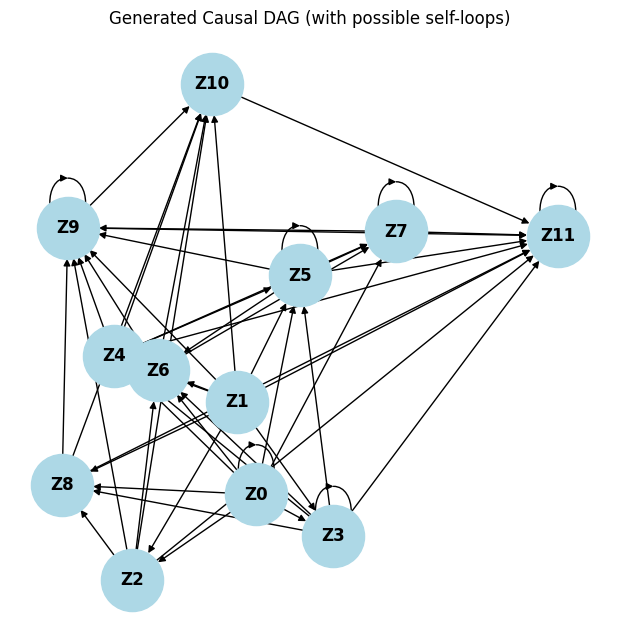

In [ ]:
n_nodes = 12          # Total variables (10 variables)
edge_prob = 0.66      # Probability of edge creation
nonlinear_prob = 0.5   # Chance of nonlinearity per edge              

sim = RandomCausalSimulator(n_nodes, edge_prob, nonlinear_prob, seed=42)
df, graph = sim.simulate()  # Only df and adj returned

print("Adjacency Matrix:")
print(graph)
print("\nSample Data:")
print(df.head())

sim.draw_dag()


<Axes: >

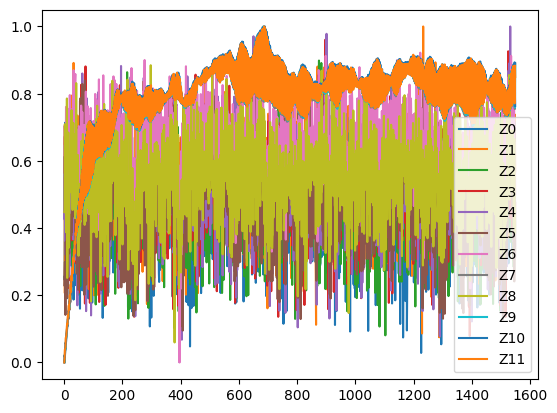

In [159]:
df.iloc[:1550, ].plot()

In [156]:
df.iloc[:50, ].corr()

,Z0,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11
Z0,1.000000,0.329731,0.831429,0.757717,0.156371,-0.396237,0.236412,-0.823235,0.842918,-0.830059,-0.841402,-0.848948
Z1,0.329731,1.000000,0.596318,0.701195,0.801490,0.608000,0.858971,0.095561,0.607227,0.086642,0.069243,0.097318
Z2,0.831429,0.596318,1.000000,0.852248,0.504116,0.015496,0.595740,-0.541536,0.882571,-0.549247,-0.552545,-0.572177
Z3,0.757717,0.701195,0.852248,1.000000,0.615368,0.127477,0.646130,-0.381970,0.879534,-0.395438,-0.456063,-0.461603
Z4,0.156371,0.801490,0.504116,0.615368,1.000000,0.796194,0.873088,0.309480,0.500669,0.300479,0.319828,0.256385
Z5,-0.396237,0.608000,0.015496,0.127477,0.796194,1.000000,0.741597,0.781123,-0.017119,0.777026,0.792062,0.760956
Z6,0.236412,0.858971,0.595740,0.646130,0.873088,0.741597,1.000000,0.239527,0.553000,0.232008,0.220302,0.220691
Z7,-0.823235,0.095561,-0.541536,-0.381970,0.309480,0.781123,0.239527,1.000000,-0.566814,0.999769,0.956179,0.950274
Z8,0.842918,0.607227,0.882571,0.879534,0.500669,-0.017119,0.553000,-0.566814,1.000000,-0.575861,-0.580274,-0.598302
Z9,-0.830059,0.086642,-0.549247,-0.395438,0.300479,0.777026,0.232008,0.999769,-0.575861,1.000000,0.958873,0.952953


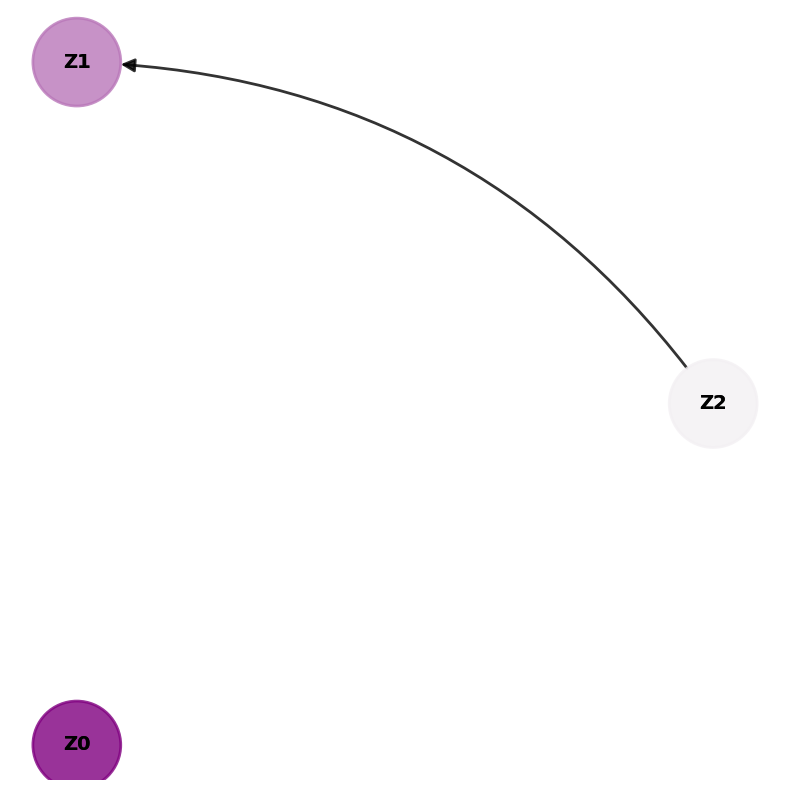

Generated Causal Matrix:
[[1 0 0]
 [0 1 0]
 [0 1 1]]

Generated Time Series Data (first few rows):
         Z0        Z1        Z2
0 -4.259748 -0.651929 -0.129825
1 -3.911874  0.386490 -0.173588
2 -3.604913 -0.509104 -0.371812
3 -3.779847  0.660964 -0.673530
4 -3.405644  0.720932 -0.548176


In [51]:
# Example Configuration:
n_nodes = 3          # Total variables (10 variables)
edge_prob = .30      # Probability of edge creation
nonlinear_prob = 0.0   # Chance of nonlinearity per edge
timesteps = 200        # Number of time steps
lag = 5                # Lag for causal effects

# Generate Data
df, causal_matrix = generate_dag_and_time_series(n_nodes, edge_prob, nonlinear_prob,
                                                     timesteps)

print("Generated Causal Matrix:")
print(causal_matrix)
print("\nGenerated Time Series Data (first few rows):")
print(df.head())

<Axes: >

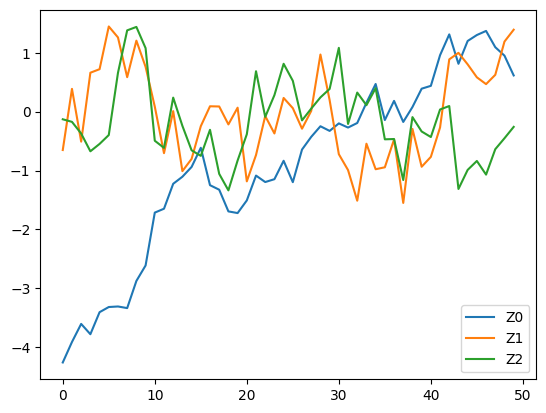

In [52]:
df.iloc[:50, :].plot()

In [53]:
df.corr()

,Z0,Z1,Z2
Z0,1.00000,0.016330,-0.007440
Z1,0.01633,1.000000,0.211841
Z2,-0.00744,0.211841,1.000000


In [10]:
# Modify the code for complete experiments
plot_path = r"../plots/"
edge_densities = np.arange(0.2, 0.3, 0.1)
etests = len(edge_densities)
group_sizes = np.arange(3, 8, 2)
# group_sizes = np.array([6])
gtests = len(group_sizes)
res_all = []

for g in range(etests):

    edge_density = edge_densities[g]
    res = np.zeros((3, 3))

    for t in range(gtests):

        nodes = group_sizes[t]
        params = {'g_one_start': 0,
                  'g_one_end': int(nodes/2),
                  'g_two_start': int(nodes/2),
                  'g_two_end': nodes
                 }

        dag = StructuralCausalModels(nodes, edge_density)
        df = dag.df



In [11]:
df

,Z1,Z2,Z3,Z4,Z5,Z6,Z7
0,0.453348,0.436025,-0.763606,-0.028544,1.720200,-0.650067,-1.308243
1,2.176822,1.772313,0.949379,2.944266,1.242207,1.162728,-0.195960
2,1.553103,2.194483,1.326759,1.344620,3.368614,5.445869,-2.321817
3,1.603594,1.475123,1.187626,0.840459,3.172912,-0.810862,1.910857
4,1.044651,0.492315,2.640046,1.388251,-0.162322,1.222865,2.770226
...,...,...,...,...,...,...,...
1995,1.690050,2.121014,0.247932,-0.767562,2.701290,0.040617,1.007946
1996,1.882140,2.555930,2.903855,1.875142,-1.138655,4.058159,-0.580152
1997,1.086196,2.093573,1.078129,-0.488059,5.400507,3.933600,-0.289859
1998,0.778784,1.663261,2.354036,-0.486425,1.502824,-0.359302,0.743826


In [13]:
dag.binary_matrix

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

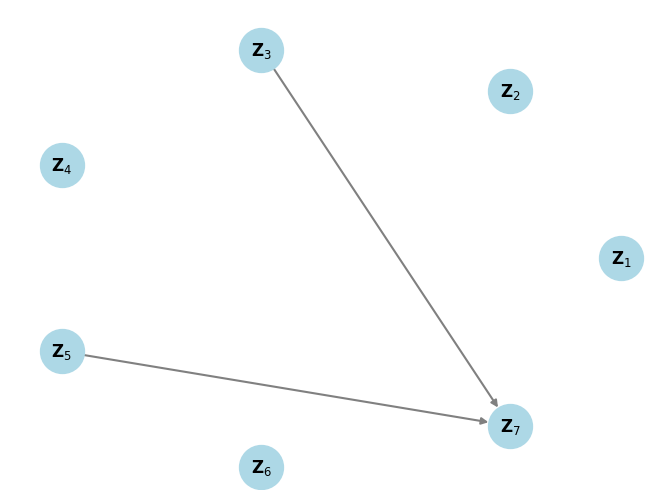

In [12]:
dag.draw_DAG()

In [ ]:
df.corr()